# Mobility score

## Preparation

In [160]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [161]:
threshold = 10 # minimal number of genomes per species
threshold_accessory = 0.9 # fraction of genomes per species an orthogroup can be present in at max. to be cosidered accessory
test_nr_orthogroups = 100

In [162]:
project_path = Path().resolve().parent

## Generate dictionary & filter for number of genomes

Key = species

Value = list of genomes

In [163]:
path_Lactobacillaceae = project_path / "data" / "genomes_metadata.csv"

In [164]:
genomes_full = pd.read_csv(path_Lactobacillaceae).loc[:,'genome':'gtdb_species']
genomes_full

,genome,gtdb_species
0,GCA_000143435.1,Ligilactobacillus salivarius
1,GCA_000167775.1,Streptococcus agalactiae
2,GCA_000167795.1,Streptococcus agalactiae
3,GCA_000179475.1,Ligilactobacillus salivarius
4,GCA_000195355.2,Lactobacillus helveticus
...,...,...
4366,GCA_902165155.1,Enterococcus_B faecium_B
4367,GCA_902165245.1,Enterococcus_B faecium
4368,GCA_902165765.1,Enterococcus_B faecium_B
4369,GCA_902165865.1,Enterococcus_B faecium


In [165]:
# dictionary: keys = species, values = genomes

genomes_dict = genomes_full.groupby('gtdb_species')['genome'].apply(list).to_dict()
genomes_dict
# ask question about Aerococcus urinae, viridans, Apilactobacillus kunkeei,...

{'26KH-42 sp004358325': ['GCA_004358325.1'],
 'Abiotrophia defectiva': ['GCA_000160075.2'],
 'Abiotrophia sp001815865': ['GCA_001815865.1'],
 'Abiotrophia sp900604935': ['GCA_900604935.1'],
 'Aerococcus christensenii': ['GCA_001466745.1',
  'GCA_001552755.1',
  'GCA_002861505.1'],
 'Aerococcus sanguinicola': ['GCA_001543145.1',
  'GCA_001806805.1',
  'GCA_002847725.1'],
 'Aerococcus sp001809535': ['GCA_001809535.1'],
 'Aerococcus sp001813115': ['GCA_001807425.1'],
 'Aerococcus sp002252085': ['GCA_002252085.1'],
 'Aerococcus sp002440555': ['GCA_002440555.1'],
 'Aerococcus sp003797145': ['GCA_003797145.1'],
 'Aerococcus suis': ['GCA_900176325.1'],
 'Aerococcus urinae': ['GCA_001544335.1'],
 'Aerococcus urinae_A': ['GCA_000193205.1'],
 'Aerococcus urinae_B': ['GCA_001649715.1',
  'GCA_001811135.1',
  'GCA_002884955.1',
  'GCA_003286555.1',
  'GCA_003286585.1',
  'GCA_003286825.1'],
 'Aerococcus urinae_C': ['GCA_003286645.1',
  'GCA_003286805.1',
  'GCA_003286845.1'],
 'Aerococcus urinae_D

In [166]:
# dictionary: keys = species, values = genomes, filtered for number of genomes per species >= threshold

genomes_selection_dict = dict(filter(lambda entry: len(entry[1]) >= threshold, genomes_dict.items()))
genomes_selection_dict

{'Apilactobacillus kunkeei_A': ['GCA_000687335.1',
  'GCA_000830375.1',
  'GCA_001281205.1',
  'GCA_001281215.1',
  'GCA_001281225.1',
  'GCA_001281285.1',
  'GCA_001421115.1',
  'GCA_001421135.1',
  'GCA_001949975.1',
  'GCA_006493415.1'],
 'Brochothrix thermosphacta': ['GCA_003537455.1',
  'GCA_000525935.1',
  'GCA_000620985.1',
  'GCA_001703515.1',
  'GCA_001703535.1',
  'GCA_001715645.1',
  'GCA_001715665.1',
  'GCA_001715725.1',
  'GCA_001715735.1',
  'GCA_001715775.1',
  'GCA_001716015.1',
  'GCA_002442515.1',
  'GCA_900218095.1',
  'GCA_900332055.1',
  'GCA_900332065.1',
  'GCA_900332075.1'],
 'Dolosigranulum pigrum': ['GCA_007197715.1',
  'GCA_000245815.1',
  'GCA_002005795.1',
  'GCA_003263915.1',
  'GCA_003263965.1',
  'GCA_003263975.1',
  'GCA_003264005.1',
  'GCA_003264015.1',
  'GCA_003264045.1',
  'GCA_003264065.1',
  'GCA_003264085.1',
  'GCA_003264135.1',
  'GCA_003264145.1',
  'GCA_901830375.1'],
 'Enterococcus faecalis': ['GCA_000205205.1',
  'GCA_000499025.1',
  'GCA

In [167]:
# number of species with number of genomes >= threshold

len(genomes_selection_dict) #check, should be 82

82

In [168]:
# total number of genomes per species

genomes_per_species = np.zeros(len(genomes_selection_dict))
i = 0;
for key, value in genomes_selection_dict.items():
    genomes_per_species[i] = len(value)
    i += 1
genomes_per_species 

array([ 10.,  16.,  14., 100.,  14.,  23., 100.,  92.,  33.,  11.,  37.,
        21.,  23.,  21.,  12., 100.,  50.,  12., 100.,  13.,  48.,  37.,
        12.,  32.,  19.,  26.,  11.,  72.,  25.,  19.,  31.,  15.,  13.,
        42.,  39.,  10.,  13.,  54.,  55.,  11.,  63., 100.,  73.,  48.,
        66.,  23.,  18., 100.,  29.,  19.,  17.,  43.,  27.,  24.,  13.,
        42.,  28.,  11.,  15., 100.,  26.,  12.,  10.,  27.,  13.,  13.,
       100.,  45.,  15., 100.,  43.,  42.,  34.,  16., 100.,  76.,  35.,
        37.,  17.,  14.,  15.,  21.])

This code generates a dictionary (genomes_selection_dict) with gtdb_species as keys, and the genomes available for this genome as values, for every species in the Lactobacillaceae family that has a number of available genomes >= threshold.

## Load pangenome file

In [169]:
path_pangenome = project_path / "data" / "pangenome.tsv"

In [170]:
pangenome = pd.read_csv(path_pangenome, delimiter = "\t", header = None)
pangenome.columns = ["gene", "genome", "orthogroup"]
pangenome

,gene,genome,orthogroup
0,CP002034.1_1719,GCA_000143435.1,F00691_06
1,AEBA01000134.1_40,GCA_000179475.1,F00691_06
2,NBEP01000018.1_44,GCA_002079655.1,F00691_06
3,DONQ01000011.1_12,GCA_003513805.1,F00691_06
4,AFMN01000001.1_591,GCA_000215465.2,F00691_06
...,...,...,...
10096366,CABGJU010000006.1_8,GCA_902159415.1,F05974_2
10096367,CABGJU010000006.1_9,GCA_902159415.1,F10537_1
10096368,CABGJU010000007.1_1,GCA_902159415.1,F00820_1
10096369,CABGJU010000009.1_1,GCA_902159415.1,F21391_1


In [171]:
# dictionary: keys = othrogroups, values = genomes

# takes long
pangenome_dict = pangenome.groupby('orthogroup')['genome'].apply(list).to_dict()
# pangenome_dict

## Find presence of orthogroups in genomes and species, and presence of orthogroups in accessory genome of species (strict and soft)

In [200]:
orthogroups = pangenome.orthogroup.unique()
orthogroups

array(['F00691_06', 'F00239_09', 'F00268_1', ..., 'F77992_1', 'F77990_1',
       'F77991_1'], dtype=object)

In [201]:
len(orthogroups)

83261

In [202]:
test_orthogroups = orthogroups[0:test_nr_orthogroups]
test_orthogroups

array(['F00691_06', 'F00239_09', 'F00268_1', 'F00239_44', 'F00653_7',
       'F00476_26', 'F00476_18', 'F01319_4', 'F00239_24', 'F00239_13',
       'F00476_12', 'F00239_42', 'F00239_67', 'F00239_69', 'F00476_30',
       'F00239_38', 'F00239_68', 'F00476_03', 'F00825_1', 'F00310_2',
       'F03328_3', 'F02366_1', 'F01186_3', 'F00326_1', 'F00867_07',
       'F00867_55', 'F00867_42', 'F00867_38', 'F00867_52', 'F00867_48',
       'F02963_2', 'F01232_31', 'F01232_22', 'F01232_26', 'F00115_5',
       'F01232_27', 'F02042_1', 'F03397_1', 'F02979_1', 'F00224_4',
       'F02051_1', 'F01162_3', 'F01366_2', 'F03466_1', 'F01354_2',
       'F03074_1', 'F00602_1', 'F00325_1', 'F01362_1', 'F00160_17',
       'F02252_2', 'F00160_10', 'F01921_1', 'F00372_20', 'F00372_16',
       'F02707_14', 'F03118_1', 'F00189_1', 'F00253_2', 'F01482_2',
       'F03442_1', 'F02437_2', 'F01152_1', 'F02358_1', 'F00923_09',
       'F00923_11', 'F01743_06', 'F00367_7', 'F01743_08', 'F00367_6',
       'F00314_1', 'F03518_3

In [203]:
species = list(genomes_selection_dict.keys())
species

['Apilactobacillus kunkeei_A',
 'Brochothrix thermosphacta',
 'Dolosigranulum pigrum',
 'Enterococcus faecalis',
 'Enterococcus_A avium',
 'Enterococcus_B durans',
 'Enterococcus_B faecium',
 'Enterococcus_B faecium_B',
 'Enterococcus_B hirae',
 'Enterococcus_B pernyi',
 'Enterococcus_D casseliflavus',
 'Enterococcus_D gallinarum',
 'Enterococcus_D sp002850555',
 'Enterococcus_E cecorum',
 'Fructilactobacillus sanfranciscensis',
 'Lacticaseibacillus paracasei',
 'Lacticaseibacillus rhamnosus',
 'Lactiplantibacillus pentosus',
 'Lactiplantibacillus plantarum',
 'Lactobacillus amylovorus',
 'Lactobacillus crispatus',
 'Lactobacillus delbrueckii',
 'Lactobacillus gasseri',
 'Lactobacillus helveticus',
 'Lactobacillus iners',
 'Lactobacillus johnsonii',
 'Lactobacillus paragasseri',
 'Lactococcus lactis',
 'Lactococcus lactis_E',
 'Latilactobacillus curvatus',
 'Latilactobacillus sakei',
 'Leuconostoc citreum',
 'Leuconostoc lactis',
 'Leuconostoc mesenteroides',
 'Levilactobacillus brevis

In [204]:
presence = np.zeros((len(test_orthogroups), len(species)))
number_genomes = np.zeros((len(test_orthogroups), len(species)))
accessory_strict = np.zeros((len(test_orthogroups), len(species)))
accessory_soft = np.zeros((len(test_orthogroups), len(species)))

In [206]:
# loop over orthogroups
# for every orthogroup, loop over species
# for every species, loop over genomes
# for every genome, check if genome has orthogroup
# keep track of presence of orthogroup in at least one genome of a species

orthogroup_count = 0
for orthogroup in test_orthogroups:
    species_count = 0
    for species_instance in species:
        presence_species = 0
        count_species = 0
        for genome in genomes_selection_dict[species_instance]:
            if genome in pangenome_dict[orthogroup]:
                presence_species = 1
                count_species += 1
        presence[orthogroup_count, species_count] = presence_species
        number_genomes[orthogroup_count, species_count] = count_species
        if count_species < genomes_per_species[species_count]:
            accessory_strict[orthogroup_count, species_count] = 1
        if count_species <= threshold_accessory * genomes_per_species[species_count]:
            accessory_soft[orthogroup_count, species_count] = 1
        species_count += 1
        
    orthogroup_count += 1

In [207]:
presence = pd.DataFrame(presence)
presence.columns = species
presence.index = test_orthogroups
presence

,Apilactobacillus kunkeei_A,Brochothrix thermosphacta,Dolosigranulum pigrum,Enterococcus faecalis,Enterococcus_A avium,Enterococcus_B durans,Enterococcus_B faecium,Enterococcus_B faecium_B,Enterococcus_B hirae,Enterococcus_B pernyi,...,Streptococcus sobrinus,Streptococcus sp001556435,Streptococcus suis,Streptococcus suis_P,Streptococcus suis_W,Streptococcus thermophilus,Streptococcus uberis,Tetragenococcus halophilus,Weissella cibaria,Weissella confusa
F00691_06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F00239_09,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
F00268_1,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
F00239_44,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
F00653_7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F02947_4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
F02538_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F02793_1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F01654_1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Frequency of orthogroups in species')

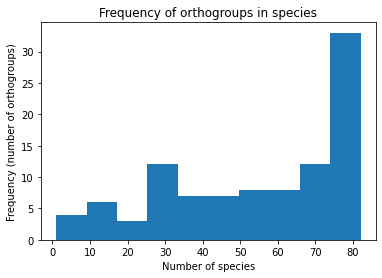

In [219]:
fig, ax = plt.subplots()
ax.hist(presence.sum(axis = 1))
ax.set_xlabel('Number of species')
ax.set_ylabel('Frequency (number of orthogroups)')
ax.set_title('Frequency of orthogroups in species')

In [209]:
number_genomes = pd.DataFrame(number_genomes)
number_genomes.columns = test_species
number_genomes.index = test_orthogroups
number_genomes

,Apilactobacillus kunkeei_A,Brochothrix thermosphacta,Dolosigranulum pigrum,Enterococcus faecalis,Enterococcus_A avium,Enterococcus_B durans,Enterococcus_B faecium,Enterococcus_B faecium_B,Enterococcus_B hirae,Enterococcus_B pernyi,...,Streptococcus sobrinus,Streptococcus sp001556435,Streptococcus suis,Streptococcus suis_P,Streptococcus suis_W,Streptococcus thermophilus,Streptococcus uberis,Tetragenococcus halophilus,Weissella cibaria,Weissella confusa
F00691_06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F00239_09,0.0,1.0,0.0,100.0,14.0,23.0,100.0,92.0,33.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0
F00268_1,10.0,0.0,0.0,100.0,14.0,23.0,100.0,92.0,33.0,11.0,...,33.0,16.0,1.0,0.0,0.0,1.0,17.0,14.0,0.0,0.0
F00239_44,10.0,16.0,14.0,100.0,14.0,23.0,100.0,92.0,33.0,11.0,...,0.0,0.0,100.0,76.0,0.0,2.0,17.0,14.0,15.0,21.0
F00653_7,10.0,16.0,14.0,100.0,14.0,23.0,100.0,92.0,33.0,11.0,...,34.0,16.0,100.0,76.0,35.0,37.0,17.0,14.0,15.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F02947_4,10.0,1.0,5.0,42.0,14.0,23.0,2.0,92.0,33.0,11.0,...,0.0,16.0,61.0,75.0,33.0,37.0,2.0,0.0,0.0,5.0
F02538_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F02793_1,0.0,4.0,0.0,0.0,0.0,1.0,13.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F01654_1,0.0,12.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,32.0,0.0,37.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Frequency of orthogroups in genomes')

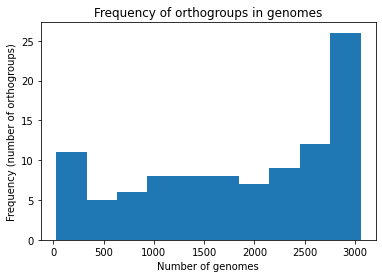

In [220]:
fig, ax = plt.subplots()
ax.hist(number_genomes.sum(axis = 1))
ax.set_xlabel('Number of genomes')
ax.set_ylabel('Frequency (number of orthogroups)')
ax.set_title('Frequency of orthogroups in genomes')

In [211]:
accessory_strict = pd.DataFrame(accessory_strict)
accessory_strict.columns = test_species
accessory_strict.index = test_orthogroups
accessory_strict

,Apilactobacillus kunkeei_A,Brochothrix thermosphacta,Dolosigranulum pigrum,Enterococcus faecalis,Enterococcus_A avium,Enterococcus_B durans,Enterococcus_B faecium,Enterococcus_B faecium_B,Enterococcus_B hirae,Enterococcus_B pernyi,...,Streptococcus sobrinus,Streptococcus sp001556435,Streptococcus suis,Streptococcus suis_P,Streptococcus suis_W,Streptococcus thermophilus,Streptococcus uberis,Tetragenococcus halophilus,Weissella cibaria,Weissella confusa
F00691_06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
F00239_09,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
F00268_1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
F00239_44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
F00653_7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F02947_4,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
F02538_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
F02793_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
F01654_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


Text(0, 0.5, 'Frequency (number of orthogroups)')

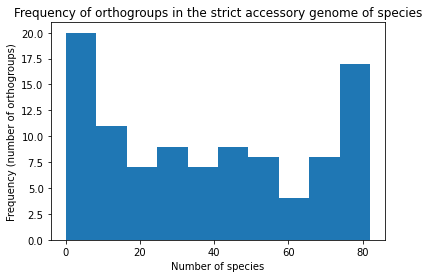

In [215]:
fig, ax = plt.subplots()
ax.hist(accessory_strict.sum(axis = 1))
ax.set_title('Frequency of orthogroups in the strict accessory genome of species')
ax.set_xlabel('Number of species')
ax.set_ylabel('Frequency (number of orthogroups)')

In [213]:
accessory_soft = pd.DataFrame(accessory_soft)
accessory_soft.columns = test_species
accessory_soft.index = test_orthogroups
accessory_soft

,Apilactobacillus kunkeei_A,Brochothrix thermosphacta,Dolosigranulum pigrum,Enterococcus faecalis,Enterococcus_A avium,Enterococcus_B durans,Enterococcus_B faecium,Enterococcus_B faecium_B,Enterococcus_B hirae,Enterococcus_B pernyi,...,Streptococcus sobrinus,Streptococcus sp001556435,Streptococcus suis,Streptococcus suis_P,Streptococcus suis_W,Streptococcus thermophilus,Streptococcus uberis,Tetragenococcus halophilus,Weissella cibaria,Weissella confusa
F00691_06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
F00239_09,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
F00268_1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
F00239_44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
F00653_7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F02947_4,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
F02538_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
F02793_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
F01654_1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


Text(0, 0.5, 'Frequency (number of orthogroups)')

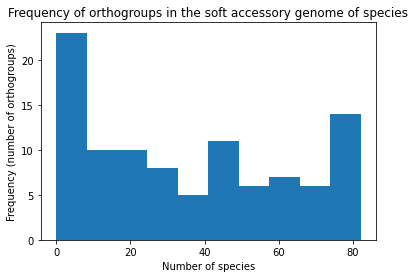

In [216]:
fig, ax = plt.subplots()
ax.hist(accessory_soft.sum(axis = 1))
ax.set_title('Frequency of orthogroups in the soft accessory genome of species')
ax.set_xlabel('Number of species')
ax.set_ylabel('Frequency (number of orthogroups)')